<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keras-Tuner-for-Age-and-Gender-Prediction" data-toc-modified-id="Keras-Tuner-for-Age-and-Gender-Prediction-1">Keras Tuner for Age and Gender Prediction</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2">Загрузка данных</a></span></li><li><span><a href="#Keras-model-creation" data-toc-modified-id="Keras-model-creation-1.3">Keras model creation</a></span><ul class="toc-item"><li><span><a href="#age-model-for-keras-tuner" data-toc-modified-id="age-model-for-keras-tuner-1.3.1">age model for keras tuner</a></span></li><li><span><a href="#AGE-ImageDataGenerator" data-toc-modified-id="AGE-ImageDataGenerator-1.3.2">AGE ImageDataGenerator</a></span></li><li><span><a href="#Создаем-tuner" data-toc-modified-id="Создаем-tuner-1.3.3">Создаем tuner</a></span></li><li><span><a href="#Запускаем-подбор-гиперпараметров" data-toc-modified-id="Запускаем-подбор-гиперпараметров-1.3.4">Запускаем подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Пространство-поиска" data-toc-modified-id="Пространство-поиска-1.3.4.1">Пространство поиска</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-1.3.4.2">Подбор гиперпараметров</a></span></li><li><span><a href="#Выбираем-лучшую-модель" data-toc-modified-id="Выбираем-лучшую-модель-1.3.4.3">Выбираем лучшую модель</a></span></li><li><span><a href="#Получаем-три-лучших-модели" data-toc-modified-id="Получаем-три-лучших-модели-1.3.4.4">Получаем три лучших модели</a></span></li><li><span><a href="#Оцениваем-качество-модели-на-тестовых-данных" data-toc-modified-id="Оцениваем-качество-модели-на-тестовых-данных-1.3.4.5">Оцениваем качество модели на тестовых данных</a></span></li></ul></li><li><span><a href="#gen-model-for-keras-tuner" data-toc-modified-id="gen-model-for-keras-tuner-1.3.5">gen model for keras tuner</a></span></li><li><span><a href="#GENDER-ImageDataGenerator" data-toc-modified-id="GENDER-ImageDataGenerator-1.3.6">GENDER ImageDataGenerator</a></span></li><li><span><a href="#Создаем-tuner" data-toc-modified-id="Создаем-tuner-1.3.7">Создаем tuner</a></span></li><li><span><a href="#Запускаем-подбор-гиперпараметров" data-toc-modified-id="Запускаем-подбор-гиперпараметров-1.3.8">Запускаем подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Пространство-поиска" data-toc-modified-id="Пространство-поиска-1.3.8.1">Пространство поиска</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-1.3.8.2">Подбор гиперпараметров</a></span></li><li><span><a href="#Выбираем-лучшую-модель" data-toc-modified-id="Выбираем-лучшую-модель-1.3.8.3">Выбираем лучшую модель</a></span></li><li><span><a href="#Получаем-три-лучших-модели" data-toc-modified-id="Получаем-три-лучших-модели-1.3.8.4">Получаем три лучших модели</a></span></li><li><span><a href="#Оцениваем-качество-модели-на-тестовых-данных" data-toc-modified-id="Оцениваем-качество-модели-на-тестовых-данных-1.3.8.5">Оцениваем качество модели на тестовых данных</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Keras Tuner for Age and Gender Prediction


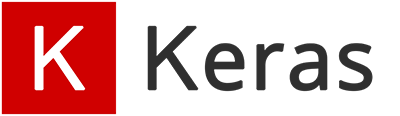

https://keras.io/keras_tuner/


## Imports

In [1]:
import os
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from sklearn.model_selection import train_test_split

from tqdm import tqdm

np.random.seed(42)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import keras_tuner
from keras_tuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import utils

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from IPython.display import Image

tf.random.set_seed(42)

## Загрузка данных

In [4]:
x_train = np.load('train_val_test/x_train.npy')
x_val = np.load('train_val_test/x_val.npy')
x_test = np.load('train_val_test/x_test.npy')

y_train_age = np.load('train_val_test/y_train_age.npy')
y_val_age = np.load('train_val_test/y_val_age.npy')
y_test_age = np.load('train_val_test/y_test_age.npy')

y_train_gen = np.load('train_val_test/y_train_gen.npy')
y_val_gen = np.load('train_val_test/y_val_gen.npy')
y_test_gen = np.load('train_val_test/y_test_gen.npy')

print(f'AGE: x_train: {x_train.shape}, y_train_age: {y_train_age.shape}\n\
     x_val:    {x_val.shape}, y_val_age:    {y_val_age.shape}\n\
     x_test:   {x_test.shape}, y_test_age:   {y_test_age.shape}')
print('')
print(f'GENDER: x_train: {x_train.shape}, y_train_gen: {y_train_gen.shape}\n\
        x_val:   {x_val.shape},  y_val_gen:    {y_val_gen.shape}\n\
        x_test:  {x_test.shape},  y_test_gen:   {y_test_gen.shape}')


AGE: x_train: (14396, 64, 64, 1), y_train_age: (14396,)
     x_val:    (3600, 64, 64, 1), y_val_age:    (3600,)
     x_test:   (4499, 64, 64, 1), y_test_age:   (4499,)

GENDER: x_train: (14396, 64, 64, 1), y_train_gen: (14396,)
        x_val:   (3600, 64, 64, 1),  y_val_gen:    (3600,)
        x_test:  (4499, 64, 64, 1),  y_test_gen:   (4499,)


## Keras model creation

In [5]:
# размер входящего изображения
x_train.shape[1:]

(64, 64, 1)

### age model for keras tuner

In [6]:
def age_model_tuner(hp):                                # random search passes this hyperparameter() object 
    model = keras.models.Sequential()
    
    model.add(Input(shape=x_train.shape[1:]))

    model.add(Conv2D(hp.Int('n_filters_1',
                                min_value=16,
                                max_value=128,
                                step=16), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(hp.Int('n_filters_2',
                                min_value=128,
                                max_value=256,
                                step=16), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(hp.Int('n_filters_3',
                                min_value=256,
                                max_value=448,
                                step=32), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(hp.Int('n_filters_4',
                                min_value=448,
                                max_value=526,
                                step=32), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    
    model.add(Dense(hp.Int('n_units_1',        
                                   min_value=128,   
                                   max_value=512,   
                                   step=32),
                     activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1,activation='relu',name='age_out'))
    
    
    model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='mse',
                  metrics=['mae'])
    
    return model


### AGE ImageDataGenerator

In [8]:

batch_size = 64

datagen_age = ImageDataGenerator(rescale=1./255., 
                                 rotation_range = 20,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 shear_range = 0.1,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 fill_mode = 'nearest')

train_age = datagen_age.flow(x_train, y_train_age, batch_size=batch_size)

val_datagen_age = ImageDataGenerator(rescale=1./255., 
                                     rotation_range = 20,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     shear_range = 0.1,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

val_age = val_datagen_age.flow(x_val, y_val_age, batch_size=batch_size)


In [9]:
age_model_tuner(keras_tuner.HyperParameters())

### Создаем tuner

In [12]:
tuner = RandomSearch(
    age_model_tuner,             # функция создания модели
    objective='val_mae',         # метрика, которую нужно оптимизировать - 
    max_trials=30,               # максимальное количество запусков обучения 
    directory='test_age_model',  # каталог, куда сохраняются обученные сети  
    project_name='age')


### Запускаем подбор гиперпараметров

#### Пространство поиска

In [82]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
n_filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
n_filters_2 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 16, 'sampling': None}
n_filters_3 (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 448, 'step': 32, 'sampling': None}
n_filters_4 (Int)
{'default': None, 'conditions': [], 'min_value': 448, 'max_value': 526, 'step': 32, 'sampling': None}
n_units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': None}


#### Подбор гиперпараметров

In [83]:
tuner.search(train_age,                # train
             batch_size=64,            # Размер мини-выборки
             epochs=30,                # Количество эпох обучения 
             validation_data=val_age,  # Часть данных, которая будет использоваться для проверки
             verbose=1
             )

Trial 30 Complete [00h 11m 12s]
val_mae: 12.191315650939941

Best val_mae So Far: 11.008752822875977
Total elapsed time: 04h 54m 21s
INFO:tensorflow:Oracle triggered exit


#### Выбираем лучшую модель

In [84]:
tuner.results_summary()

Results summary
Results in test_age_model\age
Showing 10 best trials
Trial summary
Hyperparameters:
n_filters_1: 96
n_filters_2: 176
n_filters_3: 416
n_filters_4: 512
n_units_1: 256
Score: 11.008752822875977
Trial summary
Hyperparameters:
n_filters_1: 48
n_filters_2: 144
n_filters_3: 416
n_filters_4: 512
n_units_1: 512
Score: 11.085577011108398
Trial summary
Hyperparameters:
n_filters_1: 32
n_filters_2: 192
n_filters_3: 256
n_filters_4: 512
n_units_1: 448
Score: 11.0856294631958
Trial summary
Hyperparameters:
n_filters_1: 128
n_filters_2: 240
n_filters_3: 352
n_filters_4: 512
n_units_1: 448
Score: 11.096977233886719
Trial summary
Hyperparameters:
n_filters_1: 128
n_filters_2: 240
n_filters_3: 320
n_filters_4: 512
n_units_1: 448
Score: 11.172633171081543
Trial summary
Hyperparameters:
n_filters_1: 64
n_filters_2: 240
n_filters_3: 256
n_filters_4: 480
n_units_1: 128
Score: 11.191986083984375
Trial summary
Hyperparameters:
n_filters_1: 112
n_filters_2: 144
n_filters_3: 256
n_filters_4: 51

#### Получаем три лучших модели

In [85]:
models = tuner.get_best_models(num_models=3)

#### Оцениваем качество модели на тестовых данных

In [86]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        960       
                                                                 
 activation (Activation)     (None, 62, 62, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 176)       152240    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 176)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 176)      0         
 2D)                                                    

22/22 [==============================] - 1s 44ms/step - loss: 19524792.0000 - mae: 4241.1655



Выбрана модель:

Hyperparameters:

n_filters_1: 96

n_filters_2: 176

n_filters_3: 416

n_filters_4: 512

n_units_1: 256

Score: 11.008752822875977

### gen model for keras tuner

In [45]:
def gen_model_tuner(hp):
    model = keras.models.Sequential()
    
    model.add(tf.keras.Input(x_train.shape[1:]))

    model.add(Conv2D(hp.Int('filter_11',
                                min_value=16,
                                max_value=128,
                                step=16), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(hp.Int('filter_12',
                                min_value=128,
                                max_value=256,
                                step=16), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(hp.Int('filter_13',
                                min_value=256,
                                max_value=512,
                                step=32), (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    
    model.add(Dense(hp.Int('units_11',        
                                   min_value=128,   
                                   max_value=512,   
                                   step=32),
                     activation='relu'))
    model.add(Dropout(0.6))
    
    model.add(Dense(2,activation='softmax',name='gen_out'))
    
#     model = tf.keras.models.Model(inputs=inputs, outputs=outputs_age)
    
    model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [46]:
gen_model_tuner(keras_tuner.HyperParameters())

### GENDER ImageDataGenerator

In [47]:

batch_size = 64

y_train_gen = tf.keras.utils.to_categorical(y_train[:,1], num_classes=2)
y_val_gen = tf.keras.utils.to_categorical(y_val[:,1], num_classes=2)

datagen_gen = ImageDataGenerator(rescale=1./255., 
                                 rotation_range = 20,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 shear_range = 0.1,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 fill_mode = 'nearest') 

train_gender = datagen_gen.flow(x_train, y_train_gen, batch_size=batch_size)

val_datagen_gender = ImageDataGenerator(rescale=1./255., 
                                        rotation_range = 20,
                                        width_shift_range = 0.1,
                                        height_shift_range = 0.1,
                                        shear_range = 0.1,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = 'nearest')

val_gender = val_datagen_gender.flow(x_val, y_val_gen, batch_size=batch_size)



### Создаем tuner

In [48]:
tuner = RandomSearch(
    gen_model_tuner,                   # функция создания модели
    objective='val_accuracy',         # метрика, которую нужно оптимизировать - 
    max_trials=10,               # максимальное количество запусков обучения 
    directory='test_gen_model',  # каталог, куда сохраняются обученные сети  
    project_name='gen'
    )

### Запускаем подбор гиперпараметров

#### Пространство поиска

In [49]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
filter_11 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
filter_12 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 16, 'sampling': None}
filter_13 (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 512, 'step': 32, 'sampling': None}
units_11 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': None}


#### Подбор гиперпараметров

In [50]:
tuner.search(train_gender,                # train
             batch_size=64,            # Размер мини-выборки
             epochs=10,                # Количество эпох обучения 
             validation_data=val_gender,  # Часть данных, которая будет использоваться для проверки
             verbose=1
             )

Trial 10 Complete [00h 04m 22s]
val_accuracy: 0.7839285731315613

Best val_accuracy So Far: 0.8089285492897034
Total elapsed time: 00h 38m 26s
INFO:tensorflow:Oracle triggered exit


#### Выбираем лучшую модель

In [51]:
tuner.results_summary()

Results summary
Results in test_gen_model\gen
Showing 10 best trials
Trial summary
Hyperparameters:
filter_11: 48
filter_12: 240
filter_13: 480
units_11: 416
Score: 0.8089285492897034
Trial summary
Hyperparameters:
filter_11: 64
filter_12: 128
filter_13: 288
units_11: 416
Score: 0.7892857193946838
Trial summary
Hyperparameters:
filter_11: 112
filter_12: 144
filter_13: 480
units_11: 384
Score: 0.7857142686843872
Trial summary
Hyperparameters:
filter_11: 80
filter_12: 176
filter_13: 320
units_11: 256
Score: 0.7839285731315613
Trial summary
Hyperparameters:
filter_11: 16
filter_12: 208
filter_13: 416
units_11: 224
Score: 0.7767857313156128
Trial summary
Hyperparameters:
filter_11: 96
filter_12: 208
filter_13: 512
units_11: 448
Score: 0.7749999761581421
Trial summary
Hyperparameters:
filter_11: 48
filter_12: 160
filter_13: 448
units_11: 224
Score: 0.7732142806053162
Trial summary
Hyperparameters:
filter_11: 32
filter_12: 176
filter_13: 352
units_11: 256
Score: 0.7714285850524902
Trial summ

#### Получаем три лучших модели

In [52]:
models = tuner.get_best_models(num_models=3)

#### Оцениваем качество модели на тестовых данных

In [53]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 48)        480       
                                                                 
 activation (Activation)     (None, 62, 62, 48)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 240)       103920    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 240)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 240)      0         
 2D)                                                    

Выбрана модель:

Hyperparameters:

filter_11: 48

filter_12: 240

filter_13: 480

units_11: 416

Score: 0.8089285492897034